<a href="https://colab.research.google.com/github/mjalalimanesh/Statistical-Learning-ISLR-Python/blob/master/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 3 Lab

https://github.com/mjalalimanesh/Statistical-Learning-ISLR-Python

# 3.6  Lab: Linear Regression

### 3.6.1 Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.style.use('seaborn') # pretty matplotlib plots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load Data

In [2]:
path = "https://raw.githubusercontent.com/mjalalimanesh/Statistical-Learning-ISLR-Python/master/datasets/Boston.csv"
boston = pd.read_csv(path, index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 3.6.2 Simple Linear Regression

#### Using scikit-learn

In [3]:
from sklearn import linear_model

# ols model with intercept
ols_sl = linear_model.LinearRegression(fit_intercept=True) 

x_train = np.asanyarray(boston[['lstat']])
y_true = np.asanyarray(boston['medv'])
ols_sl.fit(x_train, y_true)

# summary
ols_sl.intercept_, ols_sl.coef_

(34.5538408793831, array([-0.95004935]))

In [4]:
# metrics
from sklearn.metrics import mean_squared_error

y_pred = ols_sl.predict(x_train)

ols_sl_summary = {'Ex. Var or R2_Score': ols_sl.score(x_train, y_true),
                  'MSE': mean_squared_error(y_true, y_pred)}

for k, v in ols_sl_summary.items():
    print(k, ':', v)

Ex. Var or R2_Score : 0.5441462975864797
MSE : 38.48296722989415


#### Using Statmodels

prints p-values, f-score, confidense intervals and ...

In [5]:
import statsmodels.api as sm

# predictor & dependent var
x_train = boston['lstat']
y_true = boston['medv']

# ols model with intercept added to predictor
ols_sm = sm.OLS(y_true, sm.add_constant(x_train)).fit()

# fitted model and summary
print(ols_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           5.08e-88
Time:                        06:54:36   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [6]:
ols_sm.predict(sm.add_constant([5, 10, 15]))

array([29.80359411, 25.05334734, 20.30310057])

produce confidence and prediction interval for prediction of medv

In [7]:
predictions = ols_sm.get_prediction(sm.add_constant([5, 10, 15]))
intervals_df = predictions.summary_frame(alpha=0.05)
intervals_df.drop("mean_se", axis=1 , inplace=True)
intervals_df.columns = ["fit", "ci-lwr", "ci-upr", "pi-lwr", "pi-upr"]
intervals_df.head()

,fit,ci-lwr,ci-upr,pi-lwr,pi-upr
0,29.803594,29.007412,30.599776,17.565675,42.041513
1,25.053347,24.474132,25.632563,12.827626,37.279068
2,20.303101,19.731588,20.874613,8.077742,32.528459


#### Plots

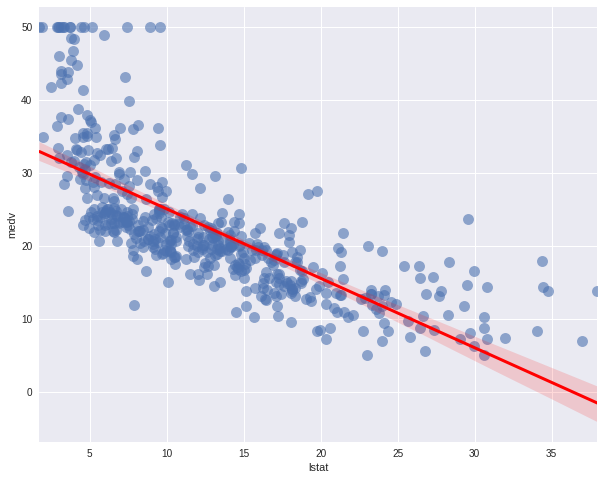

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sns.regplot(x='lstat', y='medv', data=boston, ax=ax, line_kws={"linewidth":3, "color":'r'}, scatter_kws={"s":120, "alpha":0.6})

Residual Plots

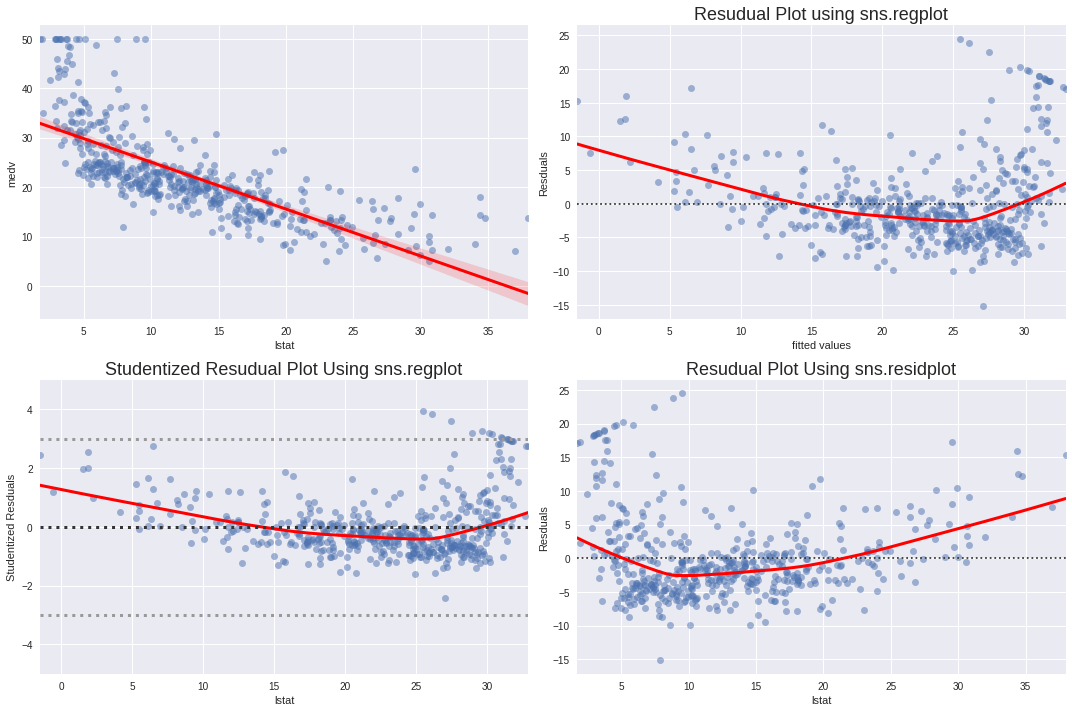

In [9]:
f, axs = plt.subplots(2, 2) 
f.set_figheight(10)
f.set_figwidth(15)


sns.regplot(x='lstat', y='medv', data=boston,
            ax=axs[0, 0],
            scatter_kws={'alpha': 0.5},
            line_kws={"linewidth":3, "color":'r'}) # regression plot
sns.regplot(x=y_pred, y=boston['medv']-y_pred,
              ax=axs[0, 1],
              scatter_kws={'alpha': 0.5},
              lowess=True,
              line_kws={"linewidth":3, "color":'r'}) # residual plot
axs[0, 1].axhline(0, ls=":", c=".2")

axs[0, 1].set_xlabel("fitted values")
axs[0, 1].set_ylabel("Resduals")
axs[0, 1].set_title("Resudual Plot using sns.regplot", fontsize=18)

sns.residplot(x='lstat', y='medv', data=boston,
              ax=axs[1, 1],
              scatter_kws={'alpha': 0.5},
              lowess=True,
              line_kws={"linewidth":3, "color":'r'}) # residual plot

axs[1, 1].set_xlabel("lstat")
axs[1, 1].set_ylabel("Resduals")
axs[1, 1].set_title("Resudual Plot Using sns.residplot", fontsize=18)

from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(ols_sm)

ols_sm_resid = ols_sm.resid # residuals
ols_sm_resid_stud = ols_sm_resid / prstd # studentized residualsp

sns.regplot(x=y_pred, y=ols_sm_resid_stud,
              ax=axs[1, 0],
              scatter_kws={'alpha': 0.5},
              lowess=True,
              line_kws={"linewidth":3, "color":'r'}) # residual plot
axs[1, 0].axhline(0, ls=":", c=".2", lw=3)
axs[1, 0].axhline(-3, ls=":", c=".6", lw=3)
axs[1, 0].axhline(3, ls=":", c=".6", lw=3)
axs[1, 0].set_ylim([-5, 5])
axs[1, 0].set_xlabel("lstat")
axs[1, 0].set_ylabel("Studentized Resduals")
axs[1, 0].set_title("Studentized Resudual Plot Using sns.regplot", fontsize=18)

plt.tight_layout()

Leverage Points Plot

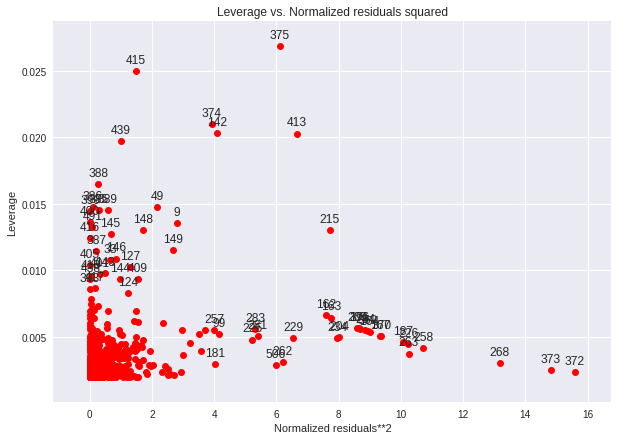

In [10]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig = plot_leverage_resid2(ols_sm, color='red') # leverage plot
fig.set_figwidth(10)
fig.set_figheight(7)

### 3.6.3 Multiple Linear Regression

#### Using Scikit-Learn

In [11]:
from sklearn import linear_model

# ols model with intercept
ols_sl = linear_model.LinearRegression() 

x_train = np.asanyarray(boston[['lstat', 'age']])
y_true = np.asanyarray(boston[['medv']])
ols_sl.fit(x_train, y_true)

# summary
ols_sl.intercept_, ols_sl.coef_

(array([33.22276053]), array([[-1.03206856,  0.03454434]]))

metrics

In [12]:
from sklearn.metrics import mean_squared_error

y_pred = ols_sl.predict(x_train)
ols_sl_summary = {'Ex. Var or R2_Score': ols_sl.score(x_train, y_true),
                  'MSE': mean_squared_error(y_true, y_pred)}

for k, v in ols_sl_summary.items():
    print(k, ':', v)

Ex. Var or R2_Score : 0.5512689379421003
MSE : 37.88167709241267


#### Using statmodels

2 features

In [13]:
import statsmodels.api as sm

# predictor & dependent var
x_train = boston[['lstat', 'age']]
y_true = boston['medv']

# ols model with intercept added to predictor
ols_sm = sm.OLS(y_true, sm.add_constant(x_train)).fit()

# fitted model and summary
print(ols_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           2.98e-88
Time:                        06:54:38   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

all features

In [14]:
# predictor & dependent var
x_train = boston.drop('medv', axis=1)
y_true = boston['medv']

# ols model with intercept added to predictor
ols_sm = sm.OLS(y_true, sm.add_constant(x_train)).fit()

# fitted model and summary
print(ols_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          6.72e-135
Time:                        06:54:38   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

variance inflation factor

In [15]:
# variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# don't forget to add constant if the ols model includes intercept
boston_exog = sm.add_constant(boston.drop('medv', axis=1))

# too fancy for printing results?
for i, col in enumerate(boston_exog.columns):
    if col == 'const':
        pass
    elif len(col) > 6:
        print(col, ':', "{0:.2f}".format(vif(np.asanyarray(boston_exog), i)))
    else:
        print(col, '\t:', "{0:.2f}".format(vif(np.asanyarray(boston_exog), i)))

crim 	: 1.79
zn 	: 2.30
indus 	: 3.99
chas 	: 1.07
nox 	: 4.39
rm 	: 1.93
age 	: 3.10
dis 	: 3.96
rad 	: 7.48
tax 	: 9.01
ptratio : 1.80
black 	: 1.35
lstat 	: 2.94


regress using all features except one

In [16]:
# predictor & dependent var
x_train = boston.drop(['medv','age'], axis=1)
y_true = boston['medv']

# ols model with intercept added to predictor
ols_sm = sm.OLS(y_true, sm.add_constant(x_train)).fit()

# fitted model and summary
print(ols_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          6.08e-136
Time:                        06:54:38   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4369      5.080      7.172      0.0

### 3.6.4 Interaction Terms

using scikit-learn

In [17]:
from patsy import dmatrices
y, X = dmatrices('medv ~ lstat + age + lstat:age', data=boston)
ols_sl.fit(X[:, 1:], y)

# summary
ols_sl.intercept_, ols_sl.coef_

(array([36.08853593]),
 array([[-1.39211684e+00, -7.20859509e-04,  4.15595185e-03]]))

Using statsmodels

In [18]:
# ols model with intercept
ols_smf = smf.ols(formula='medv ~ lstat * age', data=boston)

# fitted model and summary
ols_smf_results = ols_smf.fit()
print(ols_smf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           4.86e-88
Time:                        06:54:38   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

### 3.6.5 Nonlinear Translations of the Predictors

Using scikit-learn

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = PolynomialFeatures(2, include_bias=False).fit_transform(boston[['lstat']])
ols_sl_nl = LinearRegression()
ols_sl_nl.fit(X, y)

# summary
print("MSE : ", mean_squared_error(y, ols_sl_nl.predict(X)))
ols_sl_nl.intercept_, ols_sl_nl.coef_


MSE :  30.330520075853713


(array([42.86200733]), array([[-2.3328211 ,  0.04354689]]))

Using statsmodels

In [20]:
# ols model with intercept
ols_smf = smf.ols(formula='medv ~ lstat + np.power(lstat, 2)', data=boston)

# fitted model and summary
ols_smf_results = ols_smf.fit()
print(ols_smf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          1.56e-112
Time:                        06:54:38   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0

ANOVA of the two models

null hypothesis is that the two models fit the data equally well and the alternative hypothesis is that the full model is better. Here F-Statistic is 135 and p-value~0 so the null hypothesis is wrong and seconds model is much better

In [21]:
ols_smf = smf.ols(formula='medv ~ lstat', data=boston).fit()
ols_smf2 = smf.ols(formula='medv ~ lstat + np.power(lstat, 2)', data=boston).fit()

sm.stats.anova_lm(ols_smf, ols_smf2)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


residial plots

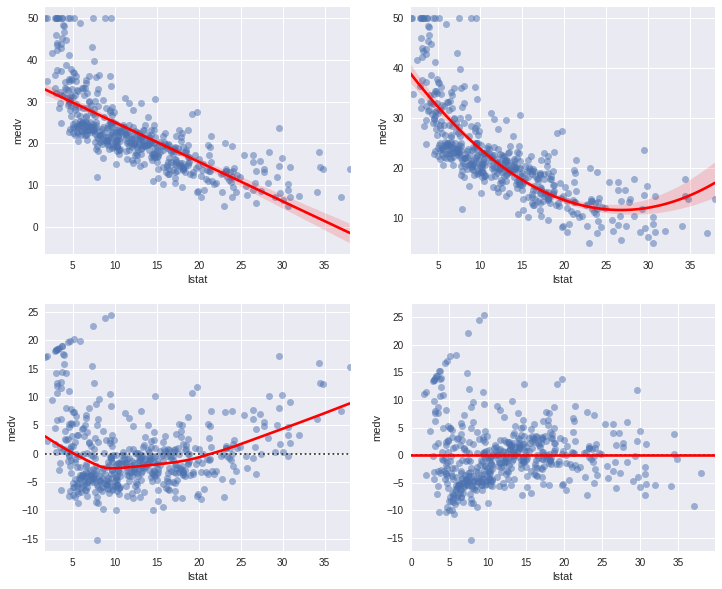

In [22]:
fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(12)

sns.regplot('lstat', 'medv', data=boston, ax=axes[0, 0], order=1, line_kws={'color': 'r'}, scatter_kws={'alpha': 0.5})
sns.regplot('lstat', 'medv', data=boston, ax=axes[0, 1], order=2, line_kws={'color': 'r'}, scatter_kws={'alpha': 0.5})
sns.residplot('lstat', 'medv', data=boston, ax=axes[1, 0], order=1, line_kws={'color': 'r'}, scatter_kws={'alpha': 0.5},lowess=True)
sns.residplot('lstat', 'medv', data=boston, ax=axes[1, 1], order=2, line_kws={'color': 'r'}, scatter_kws={'alpha': 0.5}, lowess=True)

higher order

In [23]:
# ols model with intercept
ols_smf = smf.ols(formula='medv ~ lstat + np.power(lstat, 2) + np.power(lstat, 3) + np.power(lstat, 4) + np.power(lstat, 5)',
                  data=boston)

# fitted model and summary
ols_smf_results = ols_smf.fit()
print(ols_smf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          8.73e-122
Time:                        06:54:40   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3

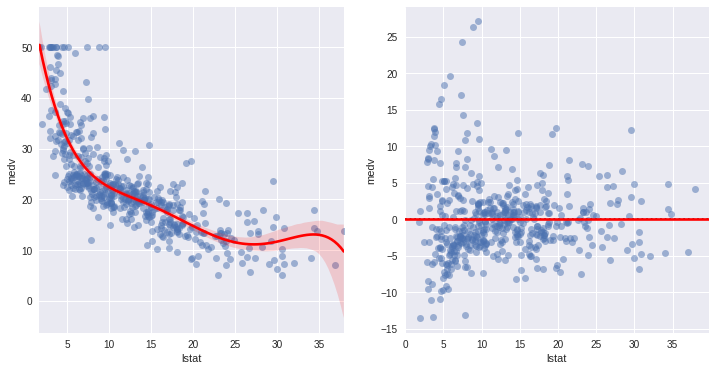

In [24]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(12)

sns.regplot('lstat', 'medv', data=boston, ax=axes[0], order=5, line_kws={'color': 'r'}, scatter_kws={'alpha': 0.5})
sns.residplot('lstat', 'medv', data=boston, ax=axes[1], order=5, line_kws={'color': 'r'}, scatter_kws={'alpha': 0.5}, lowess=True)

log

In [25]:
# polynomial ols model with intercept
ols_smf = smf.ols(formula='medv ~ np.log(rm)', data=boston)

# fitted model and summary
ols_smf_results = ols_smf.fit()
print(ols_smf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.22e-64
Time:                        06:54:40   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

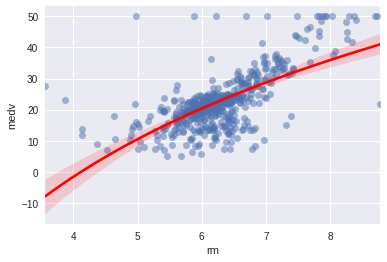

In [26]:
sns.regplot('rm', 
            'medv', 
            data=boston, 
            logx=True, 
            line_kws={'color': 'r'}, 
            scatter_kws={'alpha': 0.5});

### 3.6.6 Qualitative Predictors

In [27]:
path = "https://raw.githubusercontent.com/mjalalimanesh/Statistical-Learning-ISLR-Python/master/datasets/Carseats.csv"
carseats = pd.read_csv(path, index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [28]:
# ols model with intercept

form = 'Sales ~ CompPrice + Income + Advertising + Population + Price + Age + Education + Urban + US + Income:Advertising + Price:Age + ShelveLoc'
ols_smf = smf.ols(formula=form, data=carseats)

# fitted model and summary
ols_smf_results = ols_smf.fit()
print(ols_smf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          6.14e-166
Time:                        06:54:41   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756    

using scikit-learn and pandas

In [29]:
carseats = pd.get_dummies(data=carseats, prefix_sep="-", drop_first=True)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc-Good,ShelveLoc-Medium,Urban-Yes,US-Yes
1,9.50,138,73,11,276,120,42,17,0,0,1,1
2,11.22,111,48,16,260,83,65,10,1,0,1,1
3,10.06,113,35,10,269,80,59,12,0,1,1,1
4,7.40,117,100,4,466,97,55,14,0,1,1,1
5,4.15,141,64,3,340,128,38,13,0,0,1,0


In [30]:
x_train = np.asanyarray(carseats.drop("Sales", inplace=False, axis=1))
y_train = np.asanyarray(carseats["Sales"])
model = LinearRegression()
model.fit(x_train, y_train)

coeff_parameter = pd.DataFrame(model.coef_,carseats.drop("Sales", axis=1).columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
CompPrice,0.092815
Income,0.015803
Advertising,0.123095
Population,0.000208
Price,-0.095358
Age,-0.046045
Education,-0.021102
ShelveLoc-Good,4.850183
ShelveLoc-Medium,1.956715
Urban-Yes,0.122886


In [31]:
X_train_Sm = sm.add_constant(carseats.drop("Sales", axis=1))
ls = sm.OLS(y_train, X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          1.60e-166
Time:                        06:54:41   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.6606      0.603  